In [11]:
from os import listdir
from os.path import isfile, join

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
files = [f for f in listdir("./out/") if isfile(join("./out", f)) and not f in ["cv2.csv", "decord.csv", "tv_vr.csv"]]
print(files)

['pyav.csv', 'tv_newAPI.csv', 'tv_pyav.csv']


In [13]:
df = pd.DataFrame()
for f in files:
    df = pd.concat([df, pd.read_csv(join("./out", f))])
df

,Unnamed: 0,loader,video,time,num_frames,lib_version
0,0,pyav,RATRACE_wave_f_nm_np1_fr_goo_37.avi,0.040757,72,8.0.2
1,1,pyav,TrumanShow_wave_f_nm_np1_fr_med_26.avi,0.019241,48,8.0.2
2,2,pyav,SchoolRulesHowTheyHelpUs_wave_f_nm_np1_ba_med_...,0.025917,74,8.0.2
3,3,pyav,v_SoccerJuggling_g24_c01.avi,0.082928,251,8.0.2
4,4,pyav,v_SoccerJuggling_g23_c01.avi,0.088360,240,8.0.2
...,...,...,...,...,...,...
45,45,tv_videoreader,RATRACE_wave_f_nm_np1_fr_goo_37.avi,0.026812,72,0.8.0a0+c624266
46,46,tv_videoreader,TrumanShow_wave_f_nm_np1_fr_med_26.avi,0.015649,48,0.8.0a0+c624266
47,47,tv_videoreader,SchoolRulesHowTheyHelpUs_wave_f_nm_np1_ba_med_...,0.017253,74,0.8.0a0+c624266
48,48,tv_videoreader,v_SoccerJuggling_g24_c01.avi,0.049104,251,0.8.0a0+c624266


(array([0, 1, 2]),
 [Text(0, 0, 'pyav'), Text(1, 0, 'newAPI'), Text(2, 0, 'tv_videoreader')])

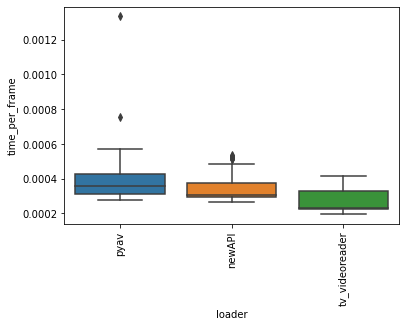

In [14]:
df["time_per_frame"] = df['time'] / df['num_frames']
import matplotlib.pylab as plt
ax = sns.boxplot(x="loader", y="time_per_frame", data=df)
plt.xticks(rotation=90)


/home/bjuncek/miniconda3/envs/tvdev/lib/python3.8/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


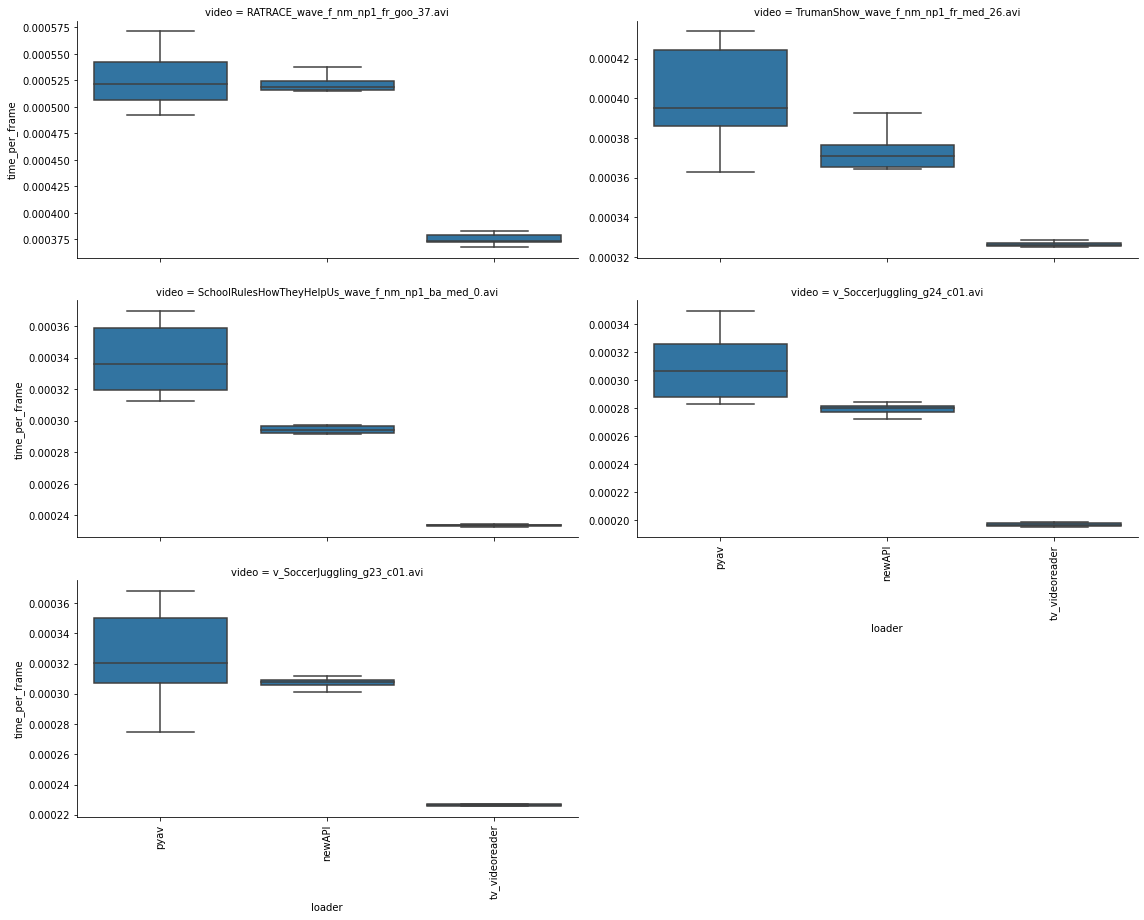

In [15]:
df["time_per_frame"] = df['time'] / df['num_frames']


g = sns.FacetGrid(df, col="video", col_wrap=2, height=4, aspect=2, sharey=False)
g = g.map(sns.boxplot, "loader", "time_per_frame", showfliers = False)
g.set_xticklabels(rotation=90)

| **function**               | **return type**             | **return description**                     | **?decoding** | **?filling tensor with decoded values** |
|----------------------------|-----------------------------|--------------------------------------------|---------------|-----------------------------------------|
| `next_list`                | torch::List<torch::Tensor>  | torch::Tensor({h, w, 3}), torch::zero({0}) | Yes           | Yes                                     |
| `next_tensor`              | torch::Tensor               | torch::Tensor({h, w, 3})                   | Yes           | Yes                                     |
| `next_list_dummy_tensor`   | torch::List <torch::Tensor> | torch::ones({h, w, 3}), torch::zero({0})   | Yes           | No (calls torch::ones)                  |
| `next_tensor_dummy_tensor` | torch::Tensor               | torch::ones({h, w, 3})                     | Yes           | No (calls torch::ones)                  |
| `next_int_numframes`       | int64_T                     | 1 if decoded successfully, 0 otherwise     | Yes           | No                                      |

In [11]:
df["pyv4"] = df["time_per_frame"] * 1000
df['pyv4'][df.loader=="pyav"] = df['pyv4'][df.loader=="pyav"] + 0.00035

<ipython-input-11-8ec252515777>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pyv4'][df.loader=="pyav"] = df['pyv4'][df.loader=="pyav"] + 0.00035
/home/bjuncek/miniconda3/envs/tvdev/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [81]:
df.head()

,Unnamed: 0,loader,video,time,num_frames,lib_version,time_per_frame,pyv4
0,0,pyav,RATRACE_wave_f_nm_np1_fr_goo_37.avi,0.034310,72,8.0.2,0.000477,0.000877
1,1,pyav,TrumanShow_wave_f_nm_np1_fr_med_26.avi,0.017768,48,8.0.2,0.000370,0.000770
2,2,pyav,SOX5yA1l24A.mp4,0.200105,332,8.0.2,0.000603,0.001003
3,3,pyav,SchoolRulesHowTheyHelpUs_wave_f_nm_np1_ba_med_...,0.022261,74,8.0.2,0.000301,0.000701
4,4,pyav,WUzgd7C1pWA.mp4,0.241122,327,8.0.2,0.000737,0.001137


In [22]:
df["time_per_frame"] = df['time'] / df['num_frames']

<AxesSubplot:xlabel='loader', ylabel='time_per_frame'>

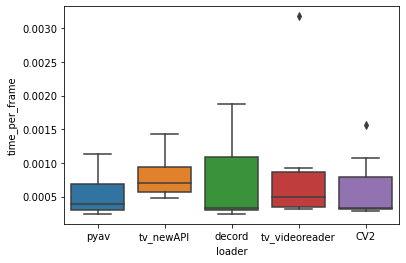

In [23]:
sns.boxplot(x="loader", y="time_per_frame", data=df)